In [27]:
import pandas as pd
import numpy as np

import pylab as plt
plt.style.use('ggplot')

<AxesSubplot:xlabel='L', ylabel='acc'>

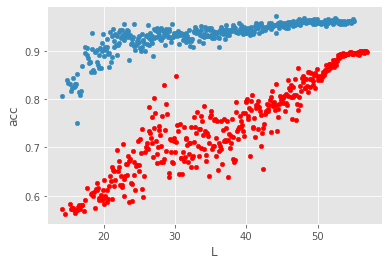

In [28]:
#df=pd.concat([pd.read_csv('/home/ishanu/Dropbox/RESDSM_.csv'),pd.read_csv('/home/ishanu/Dropbox/RESDSM__.csv'),
#              pd.read_csv('/home/ishanu/Dropbox/RESDSM_tiny.csv'),pd.read_csv('/home/ishanu/Dropbox/RESDSM_125310.csv'),
#              pd.read_csv('/home/ishanu/Dropbox/RESDSM.csv'),
#              pd.read_csv('/home/ishanu/Dropbox/RESDSMsmall.csv')])
df=pd.concat([pd.read_csv('/home/ishanu/Dropbox/RESDSM_125310.csv'),pd.read_csv('/home/ishanu/Dropbox/RESDSM_16131015.csv')])
#df=df.groupby(['nest','maxdepth']).max().reset_index()
#df=df[df.nq_mean<28.9]
df=df.dropna()
df['L'] = [np.round(x,1) for x in df.nq_mean.values]
dfm=df.groupby(['L']).mean().reset_index()
dfs=df.groupby(['L']).std().reset_index()
ax=dfm.plot.scatter(x='L',y='acc')
#dfs

#df1=pd.concat([pd.read_csv('/home/ishanu/Dropbox/RESphase1.csv'),pd.read_csv('/home/ishanu/Dropbox/RESphase1_4550.csv'),
#              pd.read_csv('/home/ishanu/Dropbox/RESphase1_new.csv'),pd.read_csv('/home/ishanu/Dropbox/RESphase1_41063.csv'),
#              pd.read_csv('/home/ishanu/Dropbox/RESphase1_125310.csv'),pd.read_csv('/home/ishanu/Dropbox/RESphase1_new_.csv')])
df1=pd.concat([pd.read_csv('/home/ishanu/Dropbox/RESphase1_125310.csv'),pd.read_csv('/home/ishanu/Dropbox/RESphase1_16131015.csv')])

#df1=df1.groupby(['nest','maxdepth']).max().reset_index()

#df1=df1[df1.nq_mean<28.55]
df1=df1.dropna()
df1['L'] = [np.round(x,1) for x in df1.nq_mean.values]
df1m=df1.groupby(['L']).mean().reset_index()
df1s=df1.groupby(['L']).std().reset_index()
df1m.plot.scatter(x='L',y='acc',ax=ax,color='r')
#dfs

In [29]:
df[df.L.between(18,20)].sort_values('acc').tail()#[(df.nest==2) & (df.maxdepth==10)]

,c1,c2,acc,s1,s2,nq_mean,nq_std,maxdepth,nest,run,L
2,0.95,0.99,0.939309,0.990625,0.797816,19.906780,3.677663,7,3,0,19.9
322,0.99,0.99,0.941686,0.942143,0.765000,19.508475,3.404249,7,3,5,19.5
899,0.95,0.99,0.943952,0.987500,0.837569,19.677966,3.619349,8,3,14,19.7
1795,0.99,0.99,0.953197,0.937944,0.843227,19.677966,3.096968,8,3,28,19.7
1027,0.99,0.99,0.963369,0.914489,0.947368,18.957627,3.065373,8,3,16,19.0


In [30]:
df1[df1.L.between(19,21)].sort_values('acc').tail()#[(df.nest==2) & (df.maxdepth==10)]

,c1,c2,acc,s1,s2,nq_mean,nq_std,maxdepth,nest,run,L
450,0.89,0.89,0.630333,0.495678,0.432185,21.046243,1.777016,7,3,7,21.0
1793,0.89,0.89,0.632431,0.434310,0.503362,19.371227,1.621435,6,3,28,19.4
130,0.84,0.85,0.640882,0.579825,0.550055,20.937701,2.054329,7,3,2,20.9
386,0.89,0.84,0.647715,0.475581,0.607005,20.779062,2.376020,7,3,6,20.8
1090,0.90,0.89,0.656619,0.506513,0.500722,19.993577,2.108785,7,3,17,20.0


<AxesSubplot:xlabel='None-maxdepth', ylabel='nest'>

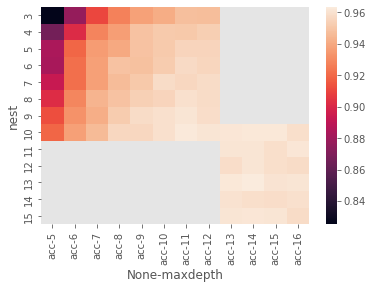

In [31]:
import seaborn as sns
F=2.65/np.sqrt(1500)
df['unc']= df.nq_std*F
df__=df[['acc','nest','maxdepth']]
df__=df__.groupby(['nest','maxdepth']).mean().reset_index()
df___=df__.pivot(index='nest',columns='maxdepth')
sns.heatmap(df___)

<AxesSubplot:xlabel='None-maxdepth', ylabel='nest'>

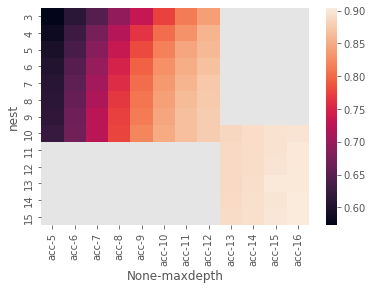

In [32]:
import seaborn as sns
F=2.65/np.sqrt(1500)
df1['unc']= df1.nq_std*F
df__=df1[['acc','nest','maxdepth']]
df__=df__.groupby(['nest','maxdepth']).mean().reset_index()
df___=df__.pivot(index='nest',columns='maxdepth')
sns.heatmap(df___)

In [33]:
dfs=df.groupby('L').std().ewm(alpha=.01).mean().sort_index()
df1s=df1.groupby('L').std().ewm(alpha=.01).mean().sort_index()
dfs

dfs=df.groupby('L').std().sort_index()*(2.6/np.sqrt(100))
df1s=df1.groupby('L').std().sort_index()*(2.6/np.sqrt(150))



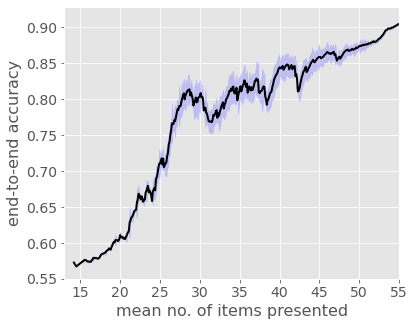

In [34]:
fig=plt.figure(figsize=[6,5])
epx=.0
LW=2
#dfm=df.groupby('L').max().sort_index().acc.ewm(alpha=.1).mean()
df1m=df1.groupby('L').max().sort_index().acc.ewm(alpha=.1).mean()
#plt.fill_between(dfm.index.values,dfm+dfs.fillna(0).acc+epx,dfm-dfs.fillna(0).acc-epx,alpha=.5)
#epx=.0
plt.fill_between(df1m.index.values,df1m+df1s.fillna(0).acc+epx,df1m-df1s.fillna(0).acc-epx,alpha=.5,color='#9999ff')
#dfm.plot(color='k',lw=LW)
df1m.plot(color='k',lw=LW)
#plt.gca().set_ylim(None,1)
plt.gca().set_xlim(13,55)
ax=plt.gca()
FS=16
FS2=14
ax.set_xlabel('mean no. of items presented',fontsize=FS)
ax.set_ylabel('end-to-end accuracy',fontsize=FS)
plt.xticks(fontsize=FS2, rotation=0);
plt.yticks(fontsize=FS2, rotation=0);
#ax.legend(['Biotype'],fontsize=FS,bbox_to_anchor=(.85, .35),ncol=1)
plt.savefig('./phase1results_new/Lvsacc_onlybiotype.png',dpi=300,bbox_inches='tight',transparent=True)
#ax=df.groupby('L').max().sort_index().acc.ewm(alpha=.2).mean().plot()
#df1.groupby('L').max().sort_index().acc.ewm(alpha=.8).mean().plot(ax=ax)
pd.DataFrame(df1m).join(pd.DataFrame(df1s.fillna(0).acc+0.0001*np.random.rand()),rsuffix='_std').to_excel('./phase1results_new/itemsVsacc.xlsx')

In [35]:
df1m.tail(1)#.std(axis=1)

L
56.9    0.907934
Name: acc, dtype: float64

In [59]:
df1s[df1s.index.values<20]

,c1,c2,acc,s1,s2,nq_mean,nq_std,maxdepth,nest,run,unc
L,,,,,,,,,,,
14.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15.4,0.000000,0.015011,0.002377,1.125251e-02,0.021213,0.000578,0.012697,0.000000,0.000000,3.002221,0.000869
15.5,0.000000,0.015011,0.001107,1.510772e-03,0.021231,0.006363,0.011131,0.000000,0.000000,1.200889,0.000762
15.6,0.022517,0.000000,0.001598,3.931082e-02,0.003002,0.007424,0.048521,0.000000,0.000000,2.251666,0.003320
15.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15.8,0.015011,0.007506,0.000131,2.032565e-02,0.017315,0.011569,0.064656,0.000000,0.000000,1.200889,0.004424
15.9,0.004503,0.000000,0.002133,4.699305e-03,0.005160,0.010702,0.029700,0.000000,0.000000,1.351000,0.002032


In [37]:
# get importance bounds
modelname='/home/ishanu/Dropbox/P1_12_10_29.mod'
# load model
import dill
with open(modelname,'rb') as f:
    M=dill.load(f)
    
def getCF(Rs,LABELS=['B1','B2','B3']):  
    CF=np.zeros([3,3])
    s2=Rs.s1
    s3=Rs.s2
    c2=Rs.c1
    c3=Rs.c2
    CF=[[c2*c3,1-c2,c2*(1-c3)],[(1-s2)*(1-s3),s2,(1-s2)*s3],[c2*(1-s3),1-c2,c2*s3]]

    CF=pd.DataFrame(CF,columns=LABELS)
    CF.index=CF.columns
    return CF

In [38]:
df1_=df1[(df1.nest>=10) & (df1.maxdepth>=12)]
S=pd.DataFrame()
count=0
for i in df1_.iterrows():
    count=count+1
    cf=getCF(i[1])
    cfvar=getCF(i[1])**2
    if S.empty:
        S=cf
        V=cfvar
    else:
        S=S+cf
        V=V+cfvar
S=S/count
V=V/count
Sbnd=np.sqrt(V-S**2)*(count/(count-1))
S=S.round(3)
Sbnd=Sbnd.round(3)
S_=S.astype(str)+' ('+(S-Sbnd).round(3).astype(str)+', '+(S+Sbnd).round(3).astype(str)+')'
S_.to_csv('confusion_phase1.csv')
S_

,B1,B2,B3
B1,"0.918 (0.896, 0.94)","0.04 (0.023, 0.057)","0.041 (0.026, 0.056)"
B2,"0.02 (0.014, 0.026)","0.853 (0.815, 0.891)","0.127 (0.092, 0.162)"
B3,"0.134 (0.101, 0.167)","0.04 (0.023, 0.057)","0.826 (0.787, 0.865)"


In [39]:
df_=df[(df.nest>=10) & (df.maxdepth>=12)]
S=pd.DataFrame()
count=0
for i in df_.iterrows():
    count=count+1
    cf=getCF(i[1],LABELS=['D1','D2',"D5"])
    cfvar=getCF(i[1],LABELS=['D1','D2',"D5"])**2
    if S.empty:
        S=cf
        V=cfvar
    else:
        S=S+cf
        V=V+cfvar
S=S/count
V=V/count
Sbnd=np.sqrt(V-S**2)*(count/(count-1))
S=S.round(3)
Sbnd=Sbnd.round(3)
S_=S.astype(str)+' ('+(S-Sbnd).round(3).astype(str)+', '+(S+Sbnd).round(3).astype(str)+')'
S_.to_csv('confusion_dsm.csv')
S_

,D1,D2,D5
D1,"0.974 (0.961, 0.987)","0.016 (0.003, 0.029)","0.01 (0.008, 0.012)"
D2,"0.005 (0.001, 0.009)","0.942 (0.909, 0.975)","0.052 (0.022, 0.082)"
D5,"0.093 (0.062, 0.124)","0.016 (0.003, 0.029)","0.891 (0.856, 0.926)"


In [40]:
dataf=pd.read_csv('combined_bsnip.csv',index_col=0).drop('DSM',axis=1)
DELVAR=['project','BACS_COMP_Z']
cols=[x for x in dataf.columns if x not in DELVAR]
feature_names=cols
feature_names=feature_names[1:]

In [41]:
import glob
MODELS=glob.glob('/home/ishanu/P1models/P1_10_*')
I={}
for modelname in MODELS:
    with open(modelname,'rb') as f:
        M=dill.load(f)

    IMP1=M[1]['estimator'].feature_importances_
    IMP2=M[2]['estimator'].feature_importances_
    IMP3=M[3]['estimator'].feature_importances_
    plt.style.use('fivethirtyeight')
    plt.style.use('ggplot')
    IMPdf=pd.DataFrame({'bio3_vs_all':IMP3,'bio2_vs_all':IMP2,'bio1_vs_all':IMP1})
    IMPdf.index=feature_names
    I[modelname]=IMPdf.transpose().reset_index()
I=pd.concat(I.values())    

In [42]:
sImean=Imean.sort_values('bio3_vs_all',axis=1,ascending=False).iloc[:,:10]
sIsd=Isd.loc[:,sImean.columns]


NameError: name 'Imean' is not defined

In [43]:
fig=plt.figure(figsize=[6,3.5])
Imean=I.groupby('index').mean()
Isd=I.groupby('index').std()
FS=18
FS2=14
w=0.33
LW=2
COL='.25'
sImean.transpose().plot(kind='bar',ax=plt.gca(),width=1)
plt.errorbar(np.arange(len(sImean.columns)), sImean.loc['bio2_vs_all',:].values,
             sIsd.loc['bio2_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=.75)
plt.errorbar(np.arange(len(sImean.columns))-w, sImean.loc['bio1_vs_all',:].values,
             sIsd.loc['bio1_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=.75)
plt.errorbar(np.arange(len(sImean.columns))+w, sImean.loc['bio3_vs_all',:].values,
             sIsd.loc['bio3_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=.75)

#plt.gca().set_xticks(np.arange(len(feature_names)))
#plt.gca().set_xticklabels(feature_names,rotation=90);
plt.gca().legend(['B1','B2','B3'],fontsize=FS,bbox_to_anchor=(.9, 1),ncol=2)
ax=plt.gca()
ax.set_ylim(0.01,0.065)
ax.set_xlabel('feature names',fontsize=FS)
ax.set_ylabel('normalized weights',fontsize=FS)
plt.xticks(fontsize=FS2, rotation=90);
plt.savefig('sorted_impPhase1.png',dpi=300,bbox_inches='tight',transparent=True)

NameError: name 'sImean' is not defined

<Figure size 432x252 with 0 Axes>

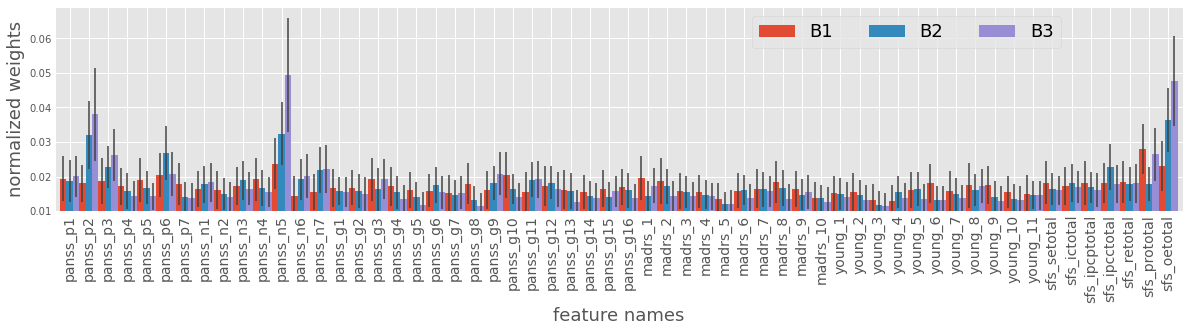

In [44]:
fig=plt.figure(figsize=[18,3.5])
Imean=I.groupby('index').mean()
Isd=I.groupby('index').std()
FS=18
FS2=14
w=0.33
LW=2
COL='.25'
Imean.transpose().plot(kind='bar',ax=plt.gca(),width=1)
plt.errorbar(np.arange(len(Imean.columns)), Imean.loc['bio2_vs_all',:].values,
             Isd.loc['bio2_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=.75)
plt.errorbar(np.arange(len(Imean.columns))-w, Imean.loc['bio1_vs_all',:].values,
             Isd.loc['bio1_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=.75)
plt.errorbar(np.arange(len(Imean.columns))+w, Imean.loc['bio3_vs_all',:].values,
             Isd.loc['bio3_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=.75)

plt.gca().set_xticks(np.arange(len(feature_names)))
plt.gca().set_xticklabels(feature_names,rotation=90);
#plt.legend(bbox_to_anchor=(.5, 1), loc='upper left', borderaxespad=0)
plt.gca().legend(['B1','B2','B3'],fontsize=FS,bbox_to_anchor=(.9, 1),ncol=3)
ax=plt.gca()
ax.set_ylim(0.01,None)
ax.set_xlabel('feature names',fontsize=FS)
ax.set_ylabel('normalized weights',fontsize=FS)
plt.xticks(fontsize=FS2, rotation=90);
plt.savefig('impPhase1.png',dpi=300,bbox_inches='tight',transparent=True)

In [45]:
Imean.transpose().join(Isd.transpose(),rsuffix='_cnfband').to_excel('./phase1results_new/feature_impotance_biotype.xlsx')

In [46]:
import glob
MODELSdsm=glob.glob('/home/ishanu/DSMmodels/DSM_10_*')
Idsm={}
for modelname in MODELSdsm:
    with open(modelname,'rb') as f:
        M=dill.load(f)

    IMP1=M[1]['estimator'].feature_importances_
    IMP2=M[2]['estimator'].feature_importances_
    IMP5=M[5]['estimator'].feature_importances_
    plt.style.use('fivethirtyeight')
    plt.style.use('ggplot')
    IMPdf=pd.DataFrame({'bio5_vs_all':IMP5,'bio2_vs_all':IMP2,'bio1_vs_all':IMP1})
    IMPdf.index=feature_names
    Idsm[modelname]=IMPdf.transpose().reset_index()
Idsm=pd.concat(Idsm.values())    

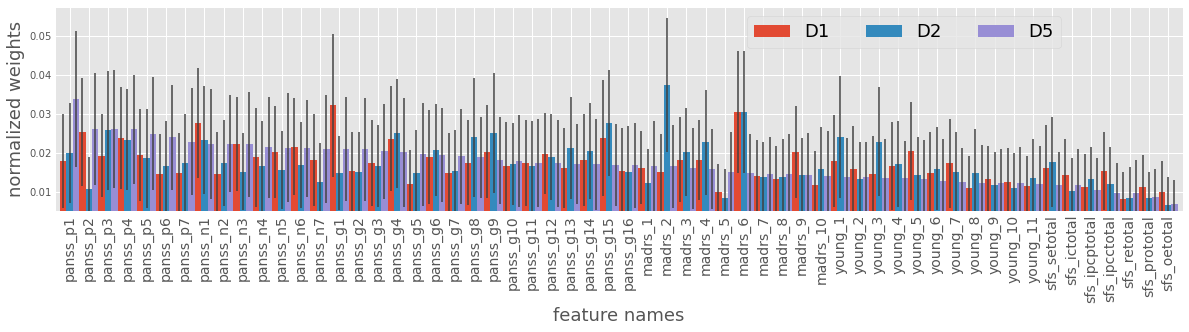

In [47]:
fig=plt.figure(figsize=[18,3.5])
Imeandsm=Idsm.groupby('index').mean()
Isddsm=Idsm.groupby('index').std()

Imeandsm=Imeandsm.transpose().sort_values('bio5_vs_all',ascending=False)
Isddsm=Isddsm.transpose()
Isddsm=Isddsm.loc[Imeandsm.index,:]
Isddsm=Isddsm.transpose()
Imeandsm=Imeandsm.transpose()

FS=18
FS2=14

w=0.33
LW=2
COL='.25'
Imeandsm.transpose().plot(kind='bar',ax=plt.gca(),width=1)
plt.errorbar(np.arange(len(Imeandsm.columns)), Imeandsm.loc['bio2_vs_all',:].values,
             Isddsm.loc['bio2_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=.75)
plt.errorbar(np.arange(len(Imeandsm.columns))-w, Imeandsm.loc['bio1_vs_all',:].values,
             Isddsm.loc['bio1_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=.75)
plt.errorbar(np.arange(len(Imeandsm.columns))+w, Imeandsm.loc['bio5_vs_all',:].values,
             Isddsm.loc['bio5_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=.75)

plt.gca().set_xticks(np.arange(len(feature_names)))
plt.gca().set_xticklabels(feature_names,rotation=90);
plt.gca().legend(['D1','D2','D5'],fontsize=FS,bbox_to_anchor=(.9, 1),ncol=3)
ax=plt.gca()
ax.set_ylim(0.0051,None)
ax.set_xlabel('feature names',fontsize=FS)
ax.set_ylabel('normalized weights',fontsize=FS)
plt.xticks(fontsize=FS2, rotation=90);
plt.savefig('impDSM.png',dpi=300,bbox_inches='tight',transparent=True)

In [48]:
sImeandsm=Imeandsm.sort_values('bio5_vs_all',axis=1,ascending=False).iloc[:,:10]
sIsddsm=Isddsm.loc[:,sImeandsm.columns]


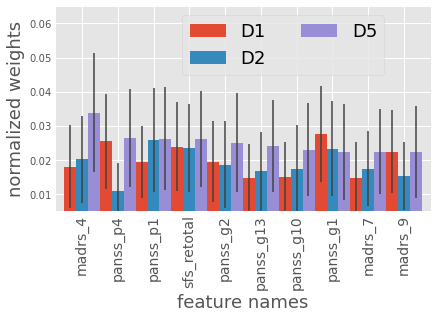

In [49]:
fig=plt.figure(figsize=[6,3.5])
FS=18
FS2=14

w=0.33
LW=2
COL='.25'
sImeandsm.transpose().plot(kind='bar',ax=plt.gca(),width=1)
plt.errorbar(np.arange(len(sImeandsm.columns)), sImeandsm.loc['bio2_vs_all',:].values,
             sIsddsm.loc['bio2_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=.75)
plt.errorbar(np.arange(len(sImeandsm.columns))-w, sImeandsm.loc['bio1_vs_all',:].values,
             sIsddsm.loc['bio1_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=.75)
plt.errorbar(np.arange(len(sImeandsm.columns))+w, sImeandsm.loc['bio5_vs_all',:].values,
             sIsddsm.loc['bio5_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=.75)

#plt.gca().set_xticks(np.arange(len(feature_names)))
#plt.gca().set_xticklabels(feature_names,rotation=90);
plt.gca().legend(['D1','D2','D5'],fontsize=FS,bbox_to_anchor=(.9, 1),ncol=2)
ax=plt.gca()
ax.set_ylim(0.0051,0.065)
ax.set_xlabel('feature names',fontsize=FS)
ax.set_ylabel('normalized weights',fontsize=FS)
plt.xticks(fontsize=FS2, rotation=90);
plt.savefig('sorted_impDSM.png',dpi=300,bbox_inches='tight',transparent=True)

In [50]:
Imeandsm

,madrs_4,panss_p4,panss_p1,sfs_retotal,panss_g2,panss_g13,panss_g10,panss_g1,madrs_7,madrs_9,...,madrs_2,young_8,madrs_1,panss_g11,young_1,madrs_5,panss_n7,panss_g8,young_9,young_3
index,,,,,,,,,,,,,,,,,,,,,
bio1_vs_all,0.017991,0.025412,0.019325,0.023769,0.019492,0.014647,0.014828,0.027705,0.014656,0.022303,...,0.013348,0.012579,0.011453,0.016088,0.014277,0.011295,0.015466,0.008075,0.011252,0.009982
bio2_vs_all,0.020084,0.010849,0.025824,0.023446,0.018594,0.016626,0.017387,0.023243,0.017398,0.015186,...,0.011661,0.011103,0.013524,0.017741,0.010173,0.013254,0.012022,0.008475,0.008554,0.006627
bio5_vs_all,0.033838,0.026259,0.026187,0.026121,0.024988,0.024053,0.022929,0.022360,0.022360,0.022232,...,0.012369,0.012310,0.012167,0.011837,0.011757,0.010443,0.009835,0.009743,0.008759,0.006876


In [51]:
Imeandsm.transpose().sort_values('bio5_vs_all',ascending=False).to_excel('phase1results_new/dsmfeaturessorted.xlsx')
Imean.transpose().sort_values('bio3_vs_all',ascending=False).to_excel('phase1results_new/phase1featuressorted.xlsx')

In [52]:

def getAVlen(clf,X,cid=0):
    RES=pd.DataFrame(columns=['Lmean','Lstd','compid'])
    count=0
    threshold={}
    feature={}
    node_indicator={}
    leaf_id={}

    for i in clf.estimators_:
        feature[count]= i.tree_.feature
        node_indicator[count] = i.tree_.decision_path(X)
        count=count+1
    
    #print(count)
    L=[]
    LL=[]
    for sample_id in np.arange(len(X)):
        L=[]
        for i in range(count-1):
            L=L+list(feature[i][node_indicator[i].indices[node_indicator[i].indptr[sample_id] : node_indicator[i].indptr[sample_id + 1]]][1:-1])
        LL=np.append(LL,len(list(set(L))))
    L=list(set(L))
    
    RES['Lmean']=[np.mean(LL)]
    RES['Lstd']=[np.std(LL)]
    RES['compid']=[cid]
    return RES    
    


In [53]:
Ef=pd.read_excel('./2022summer/adeptphase3/BIOTYPES_HC_withBiofactors_21_1008.xlsx')
Ef_=Ef[['DSM','DSM String']].dropna()
Ef_.DSM=[int(x) for x in Ef_.DSM.values]
df=pd.read_csv('combined_bsnip.csv',index_col=0).drop('DSM',axis=1)
DELVAR=['project','BACS_COMP_Z']
cols=[x for x in df.columns if x not in DELVAR]
df=df[cols]
Xphase1=df.dropna().iloc[:,1:].values.astype(np.float32)

df=df.join(Ef_).dropna()#[['DSM','Biotype']]
df=df[df['DSM String']!='HC'].drop(['Biotype','DSM String'],axis=1)
Xdsm=df.drop('DSM',axis=1).values.astype(np.float32)

In [54]:
def getModelAvLen(modelfile='/home/ishanu/P1models/P1_10_3_0.mod'):
    import sys
    import warnings

    if not sys.warnoptions:
        warnings.simplefilter("ignore")    
        
    with open(modelfile,'rb') as f:
        M=dill.load(f)
    return pd.concat([getAVlen(M[key]['estimator'],Xphase1,cid=key) for key in M.keys()])

In [57]:
import glob
MODELS=glob.glob('/home/ishanu/P1models/P1_7_3_*.mod')
af=pd.concat([getModelAvLen(model)for model in MODELS])
af

,Lmean,Lstd,compid
0,10.351959,0.948625,1
0,10.579319,1.098096,2
0,11.100835,1.046500,3
0,11.072575,0.821515,1
0,10.474631,0.846713,2
...,...,...,...
0,10.495825,0.903580,2
0,10.372511,1.419640,3
0,10.463070,1.071355,1
0,10.881824,0.931244,2


In [56]:
af[af.compid==1].mean()

Lmean     10.659752
Lstd       0.938916
compid     1.000000
dtype: float64

In [25]:
af[af.compid==2].mean()

Lmean     10.483216
Lstd       0.969531
compid     2.000000
dtype: float64

In [26]:
af[af.compid==3].mean()

Lmean     10.510191
Lstd       1.047905
compid     3.000000
dtype: float64

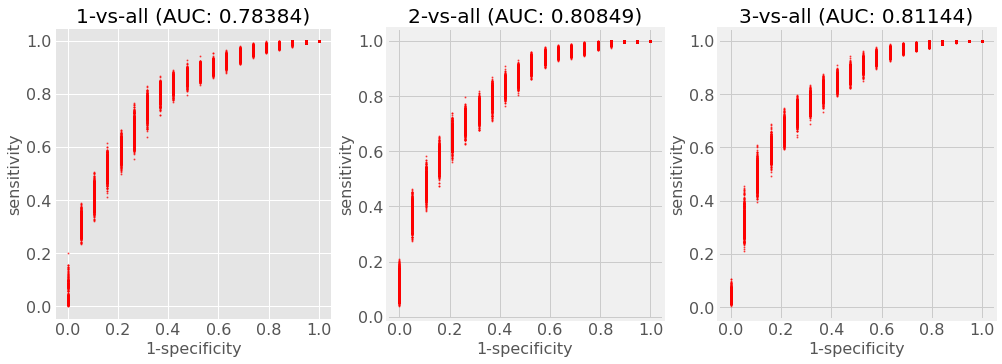

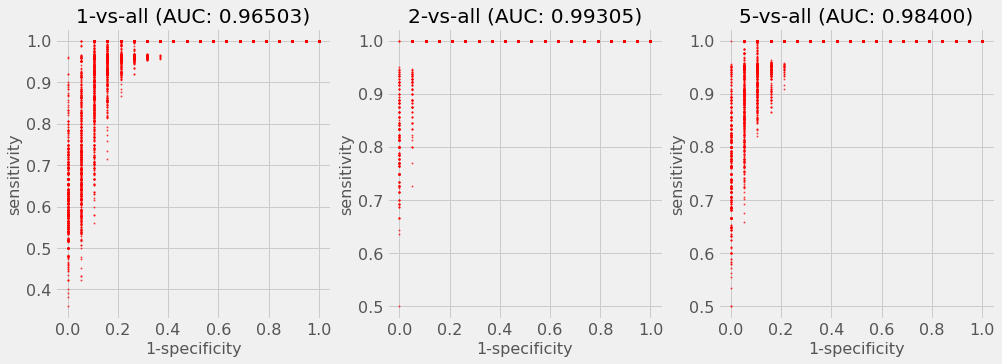

In [58]:
def pltROC(M,VAR,ax,FS=14):
    plt.style.use('fivethirtyeight')
    ROC=M[VAR]['rocs']   
    auc=[]
    for key,crv in ROC.items():
        ax.plot(crv['fpr'],crv['tpr'],'.',ms=2,color='r',alpha=.6)
        auc=np.append(auc,key)
    ax.set_xlabel('1-specificity',fontsize=FS)
    ax.set_ylabel('sensitivity',fontsize=FS)
    plt.setp(ax.get_xticklabels(), fontsize=FS);
    plt.setp(ax.get_yticklabels(), fontsize=FS);
    ax.set_title(str(VAR)+'-vs-all (AUC: '+ str(auc.mean())[:7]+')' );
   
modelfile='/home/ishanu/P1models/P1_7_3_0.mod'
with open(modelfile,'rb') as f:
    M=dill.load(f)
    

#plt.style.use('seaborn-whitegrid')
fig=plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
pltROC(M,1,plt.gca(),FS=16)

plt.subplot(1,3,2)
pltROC(M,2,plt.gca(),FS=16)

plt.subplot(1,3,3)
pltROC(M,3,plt.gca(),FS=16)
plt.savefig('./phase1results_new/ROCvall_clinical_phase1.png',dpi=400,bbox_inches='tight',transparent=True)



modelfile='/home/ishanu/DSMmodels/DSM_7_3_0.mod'
with open(modelfile,'rb') as f:
    M=dill.load(f)

#plt.style.use('seaborn-whitegrid')
fig=plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
pltROC(M,1,plt.gca(),FS=16)

plt.subplot(1,3,2)
pltROC(M,2,plt.gca(),FS=16)

plt.subplot(1,3,3)
pltROC(M,5,plt.gca(),FS=16)
plt.savefig('./phase1results_new/ROCvall_clinical_DSM.png',dpi=400,bbox_inches='tight',transparent=True)



In [64]:
rho=0.04
s1=.388
PPV1=.146
s=.62
PPV=.178
A= (1 - ((s1*rho)/PPV1))
C= (1-s1)/(1-((s1*rho)/PPV1))
B=A*s*rho*((1/PPV)-1)*C
A,B

(0.8936986301369862, 0.07008981573033708)